In [539]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [448]:
df_2 = pd.read_csv("emlak_verisi_son.csv")
df_2.drop("Unnamed: 0", axis = 1, inplace = True)
df_2.drop("Sehir", axis = 1, inplace = True)
df_2.drop("Mahalle", axis = 1, inplace = True)
df_2.dropna(inplace = True)
df = df_2.copy()

In [449]:
df = df[["İlce","Fiyat","brüt metrekare","Net Metrekare","Oda Sayısı","Binanın Yaşı","Bulunduğu Kat"]]

In [450]:
#df.dropna(inplace = True)

In [537]:
df.head()

,İlce,Fiyat,brüt metrekare,Net Metrekare,Oda Sayısı,Binanın Yaşı,Bulunduğu Kat
0,20,1890000,107,70,3,8,8
1,20,1310000,120,105,5,0,19
2,7,900000,75,68,3,8,13
3,9,1575000,200,185,5,2,13
4,15,775000,100,90,3,5,12


In [452]:
y = df["Fiyat"]
X = df.drop(["Fiyat"], axis = 1)

In [453]:
y

0         1890000
1         1310000
2          900000
3         1575000
4          775000
          ...    
1405      1575000
1406    200000000
1407       495000
1408       390000
1409       450000
Name: Fiyat, Length: 1410, dtype: int64

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 144)

In [455]:
#GridSearchCV

In [536]:
params = {"colsample_bytree":[0.4,0.5,0.6],
         "learning_rate":[0.01,0.02,0.09],
         "max_depth":[2,3,4,5,6],
         "n_estimators":[100,200,500,2000]}
params

{'colsample_bytree': [0.4, 0.5, 0.6],
 'learning_rate': [0.01, 0.02, 0.09],
 'max_depth': [2, 3, 4, 5, 6],
 'n_estimators': [100, 200, 500, 2000]}

In [457]:
xgb = XGBRegressor()

In [458]:
grid = GridSearchCV(xgb, params, cv = 10, n_jobs = -1, verbose = 2)

In [459]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [466]:
grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.02,
 'max_depth': 5,
 'n_estimators': 100}

In [467]:
xgb1 = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.09, max_depth = 4, n_estimators = 2000)


In [468]:
model_xgb = xgb1.fit(X_train, y_train)

In [469]:
X_test

,İlce,brüt metrekare,Net Metrekare,Oda Sayısı,Binanın Yaşı,Bulunduğu Kat
160,9,105,100,1,0,16
1214,9,110,100,3,7,7
561,9,110,90,3,0,7
927,2,130,110,5,5,7
640,31,127,105,5,2,0
...,...,...,...,...,...,...
237,3,120,100,3,5,0
1280,3,100,87,3,5,13
884,9,110,100,3,7,7
1086,9,110,100,3,7,7


In [553]:
pre = model_xgb.predict(X_test)[10:100]
tahmin =  model_xgb.predict(X_test)[90:100]
tahmin

array([ 610043.7 , 1698855.8 ,  500402.8 ,  698847.2 , 1950077.5 ,
        270051.12,  739204.75, 1575040.8 ,  449805.25,  614883.  ],
      dtype=float32)

In [527]:
gercek = y_test.tolist()
songercek = gercek[10:100]
gercek[10:20]



[1575000,
 525000,
 495000,
 1575000,
 2750000,
 739000,
 1250000,
 269999,
 450000,
 1434900]

In [554]:
y_test[90:100]


652      610000
570     1699000
1006     499999
1242     699000
368     1950000
315      269999
1068     739000
835     1575000
1349     450000
1370     615000
Name: Fiyat, dtype: int64

In [530]:
prelist = pre.tolist()
print(prelist)

[1575040.75, 2161401.5, 495060.4375, 1575040.75, 2749695.5, 739204.75, 1250072.5, 270051.125, 449805.25, 1434668.0, 2416652.5, 889088.875, 739204.75, 1575040.75, 400471.28125, 2806910.5, 698847.1875, 889088.875, 1600065.0, 1303778.125, 739204.75, 1150790.125, 449805.25, 897717.1875, 529934.875, 2749695.5, 739262.5625, 2232330.25, 1250072.5, 1600065.0, 1600065.0, 1706393.125, 610043.6875, 2749695.5, 1249845.125, 1249845.125, 400471.28125, 659028.875, 799836.625, 659028.875, 561286.6875, 178043.796875, 747946.6875, 540115.0625, 2749695.5, 2749695.5, 389879.46875, 739262.5625, 529934.875, 2802024.75, 400471.28125, 739262.5625, 529934.875, 4442489.0, 2325159.5, 889088.875, 540115.0625, 449805.25, 1249845.125, 270051.125, 400471.28125, 614883.0, 1250072.5, 1698855.75, 529934.875, 614883.0, 1698855.75, 1072190.125, 739204.75, 1653032.625, 2325159.5, 1575040.75, 614883.0, 270051.125, 698847.1875, 2742576.75, 2749695.5, 529934.875, 449805.25, 2325159.5, 610043.6875, 1698855.75, 500402.8125, 69

In [531]:
print(gercek)

[350000, 439000, 889000, 495000, 1250000, 340000, 1250000, 699000, 749900, 699000, 1575000, 525000, 495000, 1575000, 2750000, 739000, 1250000, 269999, 450000, 1434900, 1200000, 889000, 739000, 1575000, 439000, 4200000, 699000, 889000, 1600000, 3700000, 739000, 600000, 450000, 759000, 529900, 2750000, 739000, 650000, 1250000, 1600000, 1600000, 445000, 610000, 2750000, 1250000, 1250000, 439000, 659000, 800000, 659000, 1435000, 365000, 749900, 539999, 2750000, 2750000, 390000, 739000, 529900, 3950000, 439000, 739000, 529900, 1600000, 2325000, 889000, 539999, 450000, 1250000, 269999, 439000, 615000, 1250000, 1699000, 529900, 615000, 1699000, 800000, 739000, 1650000, 2325000, 1575000, 615000, 269999, 699000, 1940000, 2750000, 529900, 450000, 2325000, 610000, 1699000, 499999, 699000, 1950000, 269999, 739000, 1575000, 450000, 615000, 750000, 1699000, 390000, 739000, 800000, 200000000, 800000, 1434900, 439000, 2325000, 439000, 2750000, 615000, 739000, 659000, 610000, 1699000, 739000, 1000000, 

In [532]:
print(len(songercek),len(prelist))

90 90


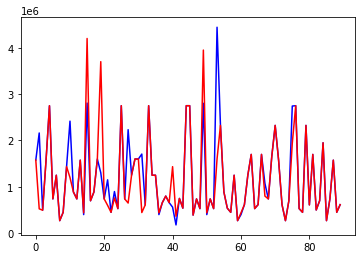

In [533]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pre , 'b')
plt.plot(songercek , 'r')

In [510]:
model_xgb.score(X_test, y_test)

C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9503276553328971

In [511]:
print('Test Seti Doğruluğu : {}%'.format(round(model_xgb.score(X_test, y_test)*100,2)))

Test Seti Doğruluğu : 95.03%


C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [512]:
np.sqrt(-1*(cross_val_score(model_xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error'))).mean()


C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-

3853521.894155795

In [513]:
importance = pd.DataFrame({"Importance": model_xgb.feature_importances_},
                         index=X_train.columns)

In [514]:
importance

,Importance
İlce,0.062191
brüt metrekare,0.277086
Net Metrekare,0.205057
Oda Sayısı,0.336730
Binanın Yaşı,0.041104
Bulunduğu Kat,0.077831
